# 5. Factor analysis

Next, we aim to analyze whether molecules localized extracellularly form consistent spatial patterns. For this, we will perform factor analysis. We will also try to link this factor with previously identified cell types

## Import packages

In [1]:
import spatialdata as sd
import troutpy 

/home/sergio/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/sergio/.local/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/sergio/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/sergio/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


## Read SpatialData object

In [2]:
xenium_path_cropped='/media/sergio/Discovair_final/mousebrain_prime_crop_points2regions_annotated.zarr'
output_path='/media/sergio/Discovair_final/analysis_crop'
sdata=sd.read_zarr(xenium_path_cropped)

/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/

## Compute NMF in extracellular space

We will compute Factorization using Non-negative matrix factorization (NMF). For this, we need to first group extracellular transcripts based on proximity. This was already done in step 1.run_segmentation_free and its result is currently stored in `sdata.tables['segmentation_free_table]`. In case segmentation-free hasn't been applied before, one can `troutpy.tl.segmentation_free_clustering` it before performing factorization.

In this example, we aim to identify 10 different factors and we will employ only 10% of the total extracellular bins to speed up the process

In [7]:
#--to do-- modify function

In [3]:
sdata=troutpy.tl.nmf(sdata, layer='transcripts', feature_key='feature_name', bin_key='bin_id', 
    density_table_key='segmentation_free_table', n_components=10, subsample_percentage=0.1,all=False)

/home/sergio/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


--to do--

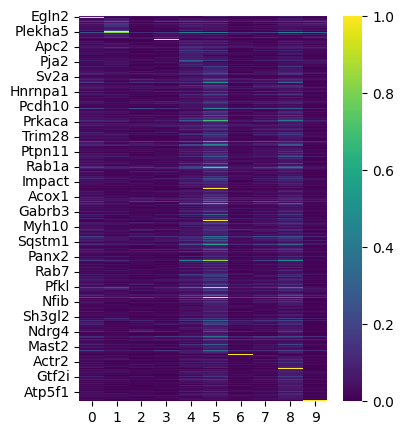

In [ ]:
## in this part we plot the factors in exrna
troutpy.pl.nmf_factors_exrna_cells_W(sdata,saving_path=output_path,save=False,spot_size=5) 
troutpy.pl.nmf_gene_contributions(sdata,nmf_adata_key='nmf_data', vmin=0.0, vmax=0.02,saving_path=output_path,save=False,figsize=(4,5))

## Apply factors to segmented cells

After we have identified relevant factors using extracellular patterns, we will apply them to cell expression in order to identify if any of the extracellular factors correspond to specific cell types 

In [4]:
sdata = troutpy.tl.apply_exrna_factors_to_cells(sdata,layer_factors='nmf_data')

/home/sergio/.local/lib/python3.10/site-packages/troutpy/tl/NMF.py:136: ImplicitModificationWarning: Setting element `.obsm['factors']` of view, initializing view as actual.
  adata_annotated_cellular.obsm['factors'] = pd.DataFrame(W_annotated, index=adata_annotated_cellular.obs.index)
/home/sergio/.local/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


--to-do---

In [1]:
troutpy.pl.paired_nmf_factors(sdata,figsize=(7,7),n_factors=10)

NameError: name 'troutpy' is not defined